In [ ]:
#https://www.kaggle.com/c/invasive-species-monitoring/data

In [1]:
from datetime import datetime
HOMEPATH = "/home/ubuntu/fastai/"
DATA_HOME_DIR = HOMEPATH + "data/invasive/"

validFract = 0.3
sampleFract = 0.2
import os

In [2]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
# Rather than importing everything manually, we'll make things easy
#   and load them all in utils.py, and just import them from there.
import utils;
from utils import *
from shutil import copyfile

import numpy as np
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

('os.getcwd:', '/home/ubuntu/fastai')


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
Using Theano backend.


In [3]:
TRAIN  = DATA_HOME_DIR + "train/"
VALID  = DATA_HOME_DIR + "valid/"
TEST   = DATA_HOME_DIR + "test/"
RESULTS = DATA_HOME_DIR + "results/"
SAMPLE =  DATA_HOME_DIR + "sample/"
SAMPLE_TRAIN = SAMPLE + "train/"
SAMPLE_VALID = SAMPLE + "valid/"
SAMPLE_TEST = SAMPLE + "test/"
SAMPLE_RESULTS = SAMPLE + "results/"

In [4]:
#change this as appropriate between smaller sample data set(SAMPLE) and production data(DATA_HOME_DIR)
#WORKING_DATA = SAMPLE
WORKING_DATA = DATA_HOME_DIR 
#------------------future me : swap between above options. do not change below--------------
WORKING_TEST = WORKING_DATA + "test/" #We use all the test data
WORKING_TRAIN = WORKING_DATA + "train/"
WORKING_VALID = WORKING_DATA + "valid/"
WORKING_RESULTS = WORKING_DATA + "results/"

print ("WORKING_DATA:", WORKING_DATA)
print ("WORKING_TEST:", WORKING_TEST)
print ("WORKING_TRAIN:", WORKING_TRAIN)
print ("WORKING_VALID:", WORKING_VALID)
print ("WORKING_RESULTS:", WORKING_RESULTS)

('WORKING_DATA:', '/home/ubuntu/fastai/data/invasive/')
('WORKING_TEST:', '/home/ubuntu/fastai/data/invasive/test/')
('WORKING_TRAIN:', '/home/ubuntu/fastai/data/invasive/train/')
('WORKING_VALID:', '/home/ubuntu/fastai/data/invasive/valid/')
('WORKING_RESULTS:', '/home/ubuntu/fastai/data/invasive/results/')


In [5]:
# traverse root directory, and list directories as dirs and files as files
print (DATA_HOME_DIR)
for root, dirs, files in os.walk(DATA_HOME_DIR):
    path = root.split(os.sep)
    print (len(path) - 1) * '-', os.path.basename(root), len(files) 

/home/ubuntu/fastai/data/invasive/
------  6
------ valid 0
------- invasive 434
------- harmless 254
------ results 4
------ train 0
------- invasive 1014
------- harmless 593
------ test 0
------- unknown 1531
------ sample 0
------- valid 0
-------- invasive 86
-------- harmless 50
------- results 3
------- train 0
-------- invasive 202
-------- harmless 118
------- test 0
-------- unknown 306


In [6]:
#initiate standard Vgg16 model
from vgg16 import Vgg16
vgg = Vgg16()

In [7]:
#finetune model with our data
batches = vgg.get_batches(WORKING_TRAIN)
vgg.finetune(batches)

Found 1607 images belonging to 2 classes.


In [8]:
#set attributes
num_epochs = 4
lr = 0.001
import time

In [9]:
startTime= datetime.now()
print ("startTime:", startTime)

train_batches = vgg.get_batches(WORKING_TRAIN)
valid_batches = vgg.get_batches(WORKING_VALID)

#NB: target_size=(224,224) if we want to load files otherwise, have to load same pixel size
timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


('startTime:', datetime.datetime(2017, 12, 13, 4, 52, 15, 651168))
Found 1607 images belonging to 2 classes.
Found 688 images belonging to 2 classes.
Time elapsed (hh:mm:ss.ms) 0:00:00.049802


In [10]:
type(train_batches)

keras.preprocessing.image.DirectoryIterator

In [11]:
#from vgg16.py: def fit(self, batches, val_batches, nb_epoch=1)
history = vgg.fit(train_batches, valid_batches, nb_epoch=4)

Epoch 1/4
1607/1607 [==============================] - 89s - loss: 0.4895 - acc: 0.8401 - val_loss: 0.2922 - val_acc: 0.8910
Epoch 2/4
1607/1607 [==============================] - 81s - loss: 0.3829 - acc: 0.8712 - val_loss: 0.3003 - val_acc: 0.8997
Epoch 3/4
1607/1607 [==============================] - 82s - loss: 0.3859 - acc: 0.8737 - val_loss: 0.3179 - val_acc: 0.8924
Epoch 4/4
1607/1607 [==============================] - 82s - loss: 0.3712 - acc: 0.8793 - val_loss: 0.4177 - val_acc: 0.8881


In [13]:
print (type(history))
print(history.history.keys())

<class 'keras.callbacks.History'>
['acc', 'loss', 'val_acc', 'val_loss']


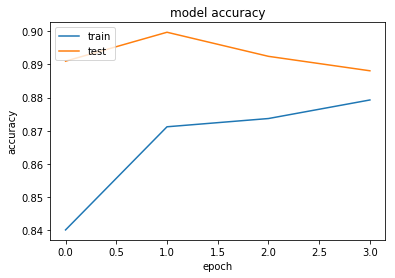

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

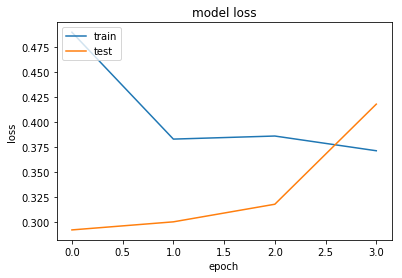

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
#vgg.model.optimizer.lr.get_value()#this worked before value was set
vgg.model.optimizer.lr = 0.0001

In [27]:
history = vgg.fit(train_batches, valid_batches, nb_epoch=4)

Epoch 1/4
1607/1607 [==============================] - 85s - loss: 0.4022 - acc: 0.8805 - val_loss: 0.2412 - val_acc: 0.9128
Epoch 2/4
1607/1607 [==============================] - 81s - loss: 0.3450 - acc: 0.8855 - val_loss: 0.3628 - val_acc: 0.8735
Epoch 3/4
1607/1607 [==============================] - 81s - loss: 0.3603 - acc: 0.8923 - val_loss: 0.3264 - val_acc: 0.8983
Epoch 4/4
1607/1607 [==============================] - 81s - loss: 0.3449 - acc: 0.9011 - val_loss: 0.3157 - val_acc: 0.8997


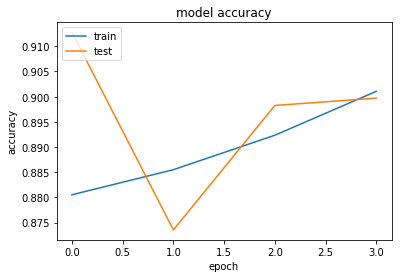

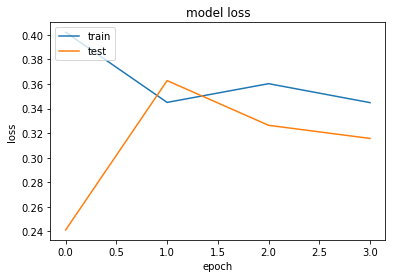

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
1607/1607 [==============================] - 85s - loss: 0.3652 - acc: 0.8948 - val_loss: 0.3366 - val_acc: 0.8750
Epoch 2/10
1607/1607 [==============================] - 82s - loss: 0.4129 - acc: 0.8799 - val_loss: 0.3038 - val_acc: 0.8924
Epoch 3/10
1607/1607 [==============================] - 80s - loss: 0.3760 - acc: 0.8917 - val_loss: 0.3295 - val_acc: 0.9041
Epoch 4/10
1607/1607 [==============================] - 81s - loss: 0.3814 - acc: 0.8930 - val_loss: 0.3439 - val_acc: 0.8924
Epoch 5/10
1607/1607 [==============================] - 82s - loss: 0.3998 - acc: 0.8917 - val_loss: 0.3162 - val_acc: 0.9099
Epoch 6/10
1607/1607 [==============================] - 81s - loss: 0.4169 - acc: 0.8923 - val_loss: 0.3317 - val_acc: 0.8997
Epoch 7/10
1607/1607 [==============================] - 83s - loss: 0.3930 - acc: 0.8979 - val_loss: 0.3409 - val_acc: 0.9084
Epoch 8/10
1607/1607 [==============================] - 81s - loss: 0.4040 - acc: 0.8905 - val_loss: 0.3116 - val_acc:

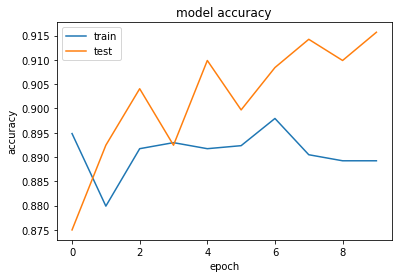

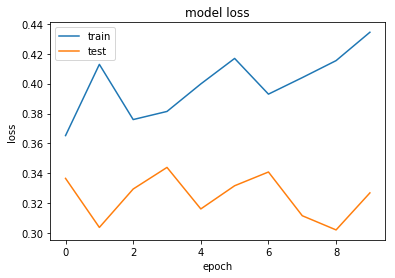

In [29]:
history = vgg.fit(train_batches, valid_batches, nb_epoch=10)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:


#gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                               height_shift_range=0.08, zoom_range=0.08)
#batches = gen.flow(X_train, y_train, batch_size=64)
#test_batches = gen.flow(X_test, y_test, batch_size=64)



In [31]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [32]:
valid_batches, valid_preds = vgg.test(WORKING_VALID)
print ("valid_batches:", type(valid_batches))
valid_filenames = valid_batches.filenames
expected_labels = valid_batches.classes
print ("valid_filenames:", type(valid_filenames), len(valid_filenames))
print ("expected_labels:", type(expected_labels), len(expected_labels))
print "valid_filenames", valid_filenames[0:5]
print "expected_labels", expected_labels[0:5]
print "valid_batches.class_indices:", valid_batches.class_indices

Found 688 images belonging to 2 classes.
('valid_batches:', <class 'keras.preprocessing.image.DirectoryIterator'>)
('valid_filenames:', <type 'list'>, 688)
('expected_labels:', <type 'numpy.ndarray'>, 688)
valid_filenames ['harmless/341.jpg', 'harmless/1681.jpg', 'harmless/440.jpg', 'harmless/1353.jpg', 'harmless/650.jpg']
expected_labels [0 0 0 0 0]
valid_batches.class_indices: {'harmless': 0, 'invasive': 1}


In [33]:
#quick visual inspection
valid_preds[:5]
#col 0 = predictions of harmless, col 1 = predictions of invasive
#nb: row sum = 1.0

array([[  1.0000e+00,   8.2002e-08],
       [  9.7958e-01,   2.0415e-02],
       [  9.9795e-01,   2.0485e-03],
       [  1.0000e+00,   3.0476e-06],
       [  9.8994e-01,   1.0058e-02]], dtype=float32)

In [34]:
our_predictions = valid_preds[:,1]
print "our_predictions:", our_predictions[0:5]
valid_pred_labels = np.round(valid_preds[:,1])
print "valid_pred_labels:", valid_pred_labels[0:5]


our_predictions: [  8.2002e-08   2.0415e-02   2.0485e-03   3.0476e-06   1.0058e-02]
valid_pred_labels: [ 0.  0.  0.  0.  0.]


In [35]:
print valid_pred_labels.shape
valid_pred_labels[0:5]

(688,)


array([ 0.,  0.,  0.,  0.,  0.], dtype=float32)

[[231  23]
 [ 35 399]]


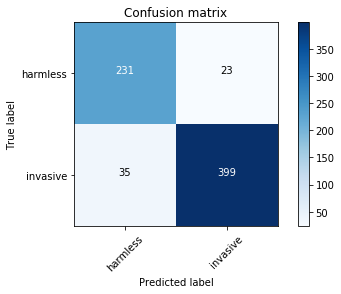

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, valid_pred_labels)
plot_confusion_matrix(cm, valid_batches.class_indices)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_labels, valid_pred_labels)

0.91569767441860461

In [38]:
#Number of images to view for each visualization task
n_view = 4

In [39]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles):
    plots([image.load_img(WORKING_VALID + valid_filenames[i]) for i in idx], titles=titles)

In [40]:
def getFilenames(idx):
    filenames_ = []
    for i in idx:
        filenames_.append(valid_filenames[i])
    return filenames_

In [41]:
def getProbs(idx):
    probs_ = []
    for i in idx:
        probs_.append(our_predictions[i])
    return probs_

In [42]:
def plotSelected(correct, description):
    print("found %d %s labels" % (len(correct), description))
    idx = np.random.permutation(correct)
    titles = np.where(our_labels[idx[:n_view]] == 0.0, 'harmless', 'invasive')
    plots_idx(idx[:n_view], titles)
    print getFilenames(idx[:n_view])
    print getProbs(idx[:n_view])


In [43]:
#selected at random: correctly predicted labels
correct = np.where(valid_pred_labels == expected_labels)[0]
plotSelected(correct, "correct")


found 630 correct labels


NameError: global name 'our_labels' is not defined

In [44]:
#selected at random: incorrectly predicted labels
correct = np.where(our_labels != expected_labels)[0]
plotSelected(correct, "incorrect")

NameError: name 'our_labels' is not defined

In [45]:
most_uncertain = np.argsort(abs(our_predictions-0.5))
plotSelected(most_uncertain[:n_view], "most uncertain")

found 4 most uncertain labels


NameError: global name 'our_labels' is not defined

In [46]:
test_batches, test_preds = vgg.test(WORKING_TEST)

Found 1531 images belonging to 1 classes.


In [47]:
test_filenames = test_batches.filenames

In [48]:
ids = np.array([int(f[8:f.find('.')]) for f in test_filenames])
ids[0:10]

array([1516,  314,  341, 1395, 1483,  943, 1457,  523,   28,  862])

In [49]:
is_invasive = test_preds[:,1]
print (is_invasive[0:5])

[  1.0000e+00   1.1104e-01   8.1496e-03   8.9134e-08   3.1166e-04]


In [50]:
#simple trick to produce unique filename
ts = str(int(time.time()))[-5:]
print "ts:", ts

ts: 46438


In [51]:
submission = np.stack((ids, is_invasive), axis = 1)
filename = WORKING_RESULTS+"aspiringguru_"+ts+".csv"
np.savetxt(filename, submission, fmt="%d,%.3f", header='name,invasive', comments='')
print "output saved to :", filename

output saved to : /home/ubuntu/fastai/data/invasive/results/aspiringguru_46438.csv


In [ ]:
#aspiringguru_42598.csv submitted 12/12 score 0.956, approx 400th on scoreboard. top scores 0.997
#aspiringguru_46438.csv submitted 13/12 score 0.95114. worse than previous submission. refer plots of accuracy and losses.

In [ ]:
from keras.models import load_model
vgg.model.save(WORKING_RESULTS+"aspiringguru_stock-Vgg16_model_"+ts+".h5")
vgg.model.save_weights(WORKING_RESULTS+"aspiringguru_stock-Vgg16_weights_"+ts+".h5")